In [ ]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# import datetime package
import datetime as dt

# set display
pd.set_option("display.max_columns", None)

# Import Data

In [ ]:
#transaction
url='https://docs.google.com/spreadsheets/d/1ZMd8tnmPVHxV_x7kw1fGTShvLS457Uv794uwG-jzcp0/edit#gid=506277663'
url= url.replace('/edit#gid=', '/export?format=csv&gid=')
trx= pd.read_csv(url)
trx.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5


In [ ]:
#cust
url1='https://docs.google.com/spreadsheets/d/1nQE2CNWA5EoYh0vwtWBsvjpfObVtbjql/edit#gid=70033673'
url1= url1.replace('/edit#gid=', '/export?format=csv&gid=')
cust= pd.read_csv(url1)
cust.head()

,CustomerID,Gender,Location
0,17850,M,Chicago
1,13047,M,California
2,12583,M,Chicago
3,13748,F,California
4,15100,M,California


In [ ]:
trx = pd.merge(trx, cust, on = 'CustomerID')
trx.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Gender,Location
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,M,Chicago
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,M,Chicago
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,M,Chicago
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,M,Chicago
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,M,Chicago


In [ ]:
# check data duplicate
trx.duplicated().sum()

0

In [ ]:
# check data type
trx.dtypes

CustomerID               int64
Transaction_ID           int64
Transaction_Date        object
Product_SKU             object
Product_Description     object
Product_Category        object
Quantity                 int64
Avg_Price              float64
Delivery_Charges       float64
Gender                  object
Location                object
dtype: object

In [ ]:
# copy train_set data
eda = trx.copy()

In [ ]:
# check mising value
eda.isna().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Gender                 0
Location               0
dtype: int64

In [ ]:
# check duplicated data
print(f"Number of duplicated rows: {eda.duplicated().sum()}")

Number of duplicated rows: 0


In [ ]:
# check data types
eda.dtypes

CustomerID               int64
Transaction_ID           int64
Transaction_Date        object
Product_SKU             object
Product_Description     object
Product_Category        object
Quantity                 int64
Avg_Price              float64
Delivery_Charges       float64
Gender                  object
Location                object
dtype: object

In [ ]:
eda.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,52924.0,15346.709810,1766.556020,12346.00,13869.0,15311.00,16996.25,18283.00
Transaction_ID,52924.0,32409.825675,8648.668977,16679.00,25384.0,32625.50,39126.25,48497.00
Quantity,52924.0,4.497638,20.104711,1.00,1.0,1.00,2.00,900.00
Avg_Price,52924.0,52.237646,64.006882,0.39,5.7,16.99,102.13,355.74
Delivery_Charges,52924.0,10.517630,19.475613,0.00,6.0,6.00,6.50,521.36


In [ ]:
# change the data types for Transaction_Date
eda['Transaction_Date'] = pd.to_datetime(eda['Transaction_Date'])

In [ ]:
# validate the data types
eda.dtypes

CustomerID                      int64
Transaction_ID                  int64
Transaction_Date       datetime64[ns]
Product_SKU                    object
Product_Description            object
Product_Category               object
Quantity                        int64
Avg_Price                     float64
Delivery_Charges              float64
Gender                         object
Location                       object
dtype: object

#EDA Part 1

In [ ]:
# validate
print('EDA data shape      :', eda.shape)

EDA data shape      : (52924, 11)


In [ ]:
eda.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,52924.0,15346.709810,1766.556020,12346.00,13869.0,15311.00,16996.25,18283.00
Transaction_ID,52924.0,32409.825675,8648.668977,16679.00,25384.0,32625.50,39126.25,48497.00
Quantity,52924.0,4.497638,20.104711,1.00,1.0,1.00,2.00,900.00
Avg_Price,52924.0,52.237646,64.006882,0.39,5.7,16.99,102.13,355.74
Delivery_Charges,52924.0,10.517630,19.475613,0.00,6.0,6.00,6.50,521.36


**Summary**
- The `Quantity` and `Price` minimum value are positives.
- There are some potential outliers on the data.
- We have to exclude them.

In [ ]:
#  Check for missing values*
eda.isna().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Gender                 0
Location               0
dtype: int64

In [ ]:
# Check for value counts
eda['Transaction_ID'].value_counts()

32526    35
22958    30
40807    29
34094    28
38059    27
         ..
23737     1
23738     1
23739     1
23740     1
48497     1
Name: Transaction_ID, Length: 25061, dtype: int64

In [ ]:
# Check invoice duplicates
eda[eda['Transaction_ID'] == '40807']

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Gender,Location


In [ ]:
# check data duplicate
eda.duplicated().sum()

0

In [ ]:
# check transaction data (first and last transaction)
print(f'First Transaction : {str(eda["Transaction_Date"].min())}')
print(f'Last Transaction  : {str(eda["Transaction_Date"].max())}')

First Transaction : 2019-01-01 00:00:00
Last Transaction  : 2019-12-31 00:00:00


The data consist of about 1 year transaction data

# RFM

First, set the **latest date**.
- Because last transaction is 2019-12-31, we can set 2020-01-05 as a possible reference days (not too far away from the day of the last transaction)

In [ ]:
# Set a reference date
LATEST_DATE = pd.to_datetime('2020-01-05')

LATEST_DATE

Timestamp('2020-01-05 00:00:00')

After that we can create the RFM-T features:
- **Recency** (R) <br>
Recency refers to the time elapsed since a customer's last interaction or transaction with a company.
It measures **how recently a customer has engaged** with the business

- **Frequency** (F)<br>
Frequency represents the number of transaction occurs.
It measures how often a customer engages with the business.

- **Monetary** (M)<br>
Monetary refers to the total monetary value of a customer's transactions or purchases.

- **Tenure** (T) <br>
The length of time a customer remains a customer **until the latest date**

In [ ]:
# Define some functions
def calculate_recency(x):
    """Calculate the recency (days) based on the reference date"""
    return (LATEST_DATE - x.max()).days

def calculate_tenure(x):
    """Calculate the tenure (days) based on the reference date"""
    return (x.max() - x.min()).days

def calculate_frequency(x):
    """Calculate the frequency based on the latest date"""
    return len(set(x))

def generate_rfmts(data):
    """
    Function to generate the RFM + TS data

    Parameter
    ---------
    data : pandas Dataframe
        The sample data

    Return
    ------
    rfmts_data : pandas Dataframe
        The RFM + TS data
    """
    # 1. Create sales data --> sales = quantity x price
    data['Sales'] = data['Quantity'] * data['Avg_Price']

    # 2. Groupby by `Customer ID` to generate the RFM + TS data
    agg_dict = {
        'Transaction_Date': [calculate_recency, calculate_tenure],
        'Transaction_ID': calculate_frequency,
        'Sales': 'sum'
    }
    data_rfmts = data.groupby('CustomerID').agg(agg_dict)

    # 3. Rename columns
    data_rfmts.columns = ['Recency', 'Tenure', 'Frequency', 'Monetary']

    # 4. Change index type
    data_rfmts.index = data_rfmts.index.astype('int')

    return data_rfmts

In [ ]:
eda_rfm_data = generate_rfmts(data = eda)

# Validate
# rows of eda_rfm_data == number of unique customer ID
print('RFM data shape :', eda_rfm_data.shape)
assert eda_rfm_data.shape[0] == len(set(eda['CustomerID']))

RFM data shape : (1468, 4)


Summary, the data is valid, the number of rows in RFM data is equal to number of unique **customer ID**

In [ ]:
# Sanity check
eda_rfm_data.head()

,Recency,Tenure,Frequency,Monetary
CustomerID,,,,
12346,112,0,1,30.99
12347,64,223,31,13834.90
12348,78,119,8,1442.12
12350,22,0,11,1360.07
12356,112,0,13,1442.47


# EDA Part 2

In [ ]:
eda_rfm_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,1468.0,149.292234,101.936959,5.0,60.0000,136.00,225.0000,369.00
Tenure,1468.0,64.358992,97.383296,0.0,0.0000,0.50,121.0000,358.00
Frequency,1468.0,18.141008,24.976414,1.0,5.0000,11.00,23.0000,328.00
Monetary,1468.0,3181.740204,5065.804553,1.0,652.4125,1750.41,3917.8875,75937.55


**Summary**
- There is no negative value of `Recency`, `Tenure`, `Frequency` and `Monetary`.
- All variables are valid.
- There is an oddly high number of `Frequency` and `Monetary`. We might have to remove that.

In [ ]:
# There are many one time buyers, i.e. `Frequency == 1`.
eda_rfm_data[eda_rfm_data['Frequency'] == 1]

,Recency,Tenure,Frequency,Monetary
CustomerID,,,,
12346,112,0,1,30.99
12434,227,0,1,31.52
12503,162,0,1,10.63
12586,307,0,1,18.99
12643,140,0,1,60.79
...,...,...,...,...
18113,303,0,1,93.47
18141,227,0,1,30.38
18193,274,0,1,8.40


- Check customer with tenure = 0
- We want to know is there any customer with tenure = 0 but frequency > 1

In [ ]:
eda_rfm_data[eda_rfm_data['Tenure'] == 0].sample(6)

,Recency,Tenure,Frequency,Monetary
CustomerID,,,,
13402,340,0,9,1338.56
17135,339,0,6,1409.00
16556,220,0,9,1432.59
17633,207,0,1,15.99
12480,152,0,14,1290.43
12591,64,0,21,4440.63


- We have customer with tenure = 0 and frequency != 1
- It means they are not one time purchaser

In [ ]:
# Monetary description
eda_rfm_data[eda_rfm_data['Frequency'] == 1]['Monetary'].describe()

count     125.000000
mean      121.733520
std       193.581265
min         1.000000
25%        17.570000
50%        46.170000
75%       153.710000
max      1516.020000
Name: Monetary, dtype: float64

There are some outliers.

**Summary**
- Marketers interest to segment non-one time purchaser.
- Therefore, we exclude the customer with `Frequency < 2`, i.e. exclude the one time purchaser.

In [ ]:
# Filter data
eda_rfm_data = eda_rfm_data[eda_rfm_data['Frequency'] >= 2]

# validate
eda_rfm_data.describe().T

,Recency,Tenure,Frequency,Monetary
count,1343.000000,1343.000000,1343.000000,1343.000000
mean,145.348474,70.349218,19.736411,3466.550953
std,101.601560,99.725231,25.534534,5205.369737
min,5.000000,0.000000,2.000000,19.380000
25%,54.500000,0.000000,6.000000,887.935000
50%,130.000000,1.000000,12.000000,2012.170000
75%,217.000000,137.500000,25.000000,4234.335000
max,368.000000,358.000000,328.000000,75937.550000


- We only consider one time purchaser as customers purchase once (frequency = 1)

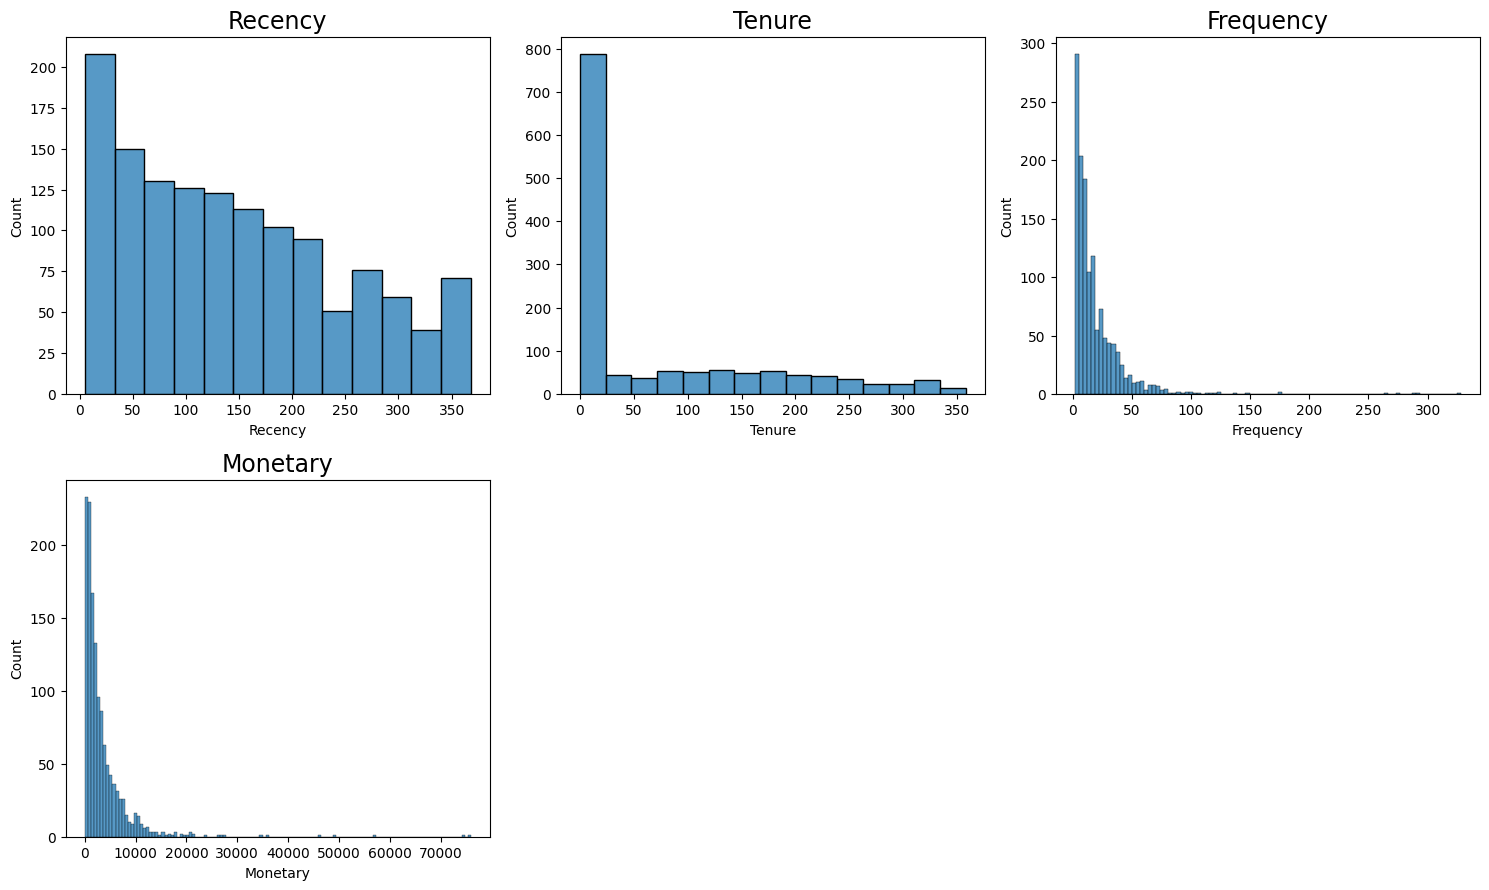

In [ ]:
plt.figure(figsize=(15,13))
for col in range(0, len(eda_rfm_data.columns)):
    plt.subplot(3,3,col+1)
    sns.histplot(x=eda_rfm_data[eda_rfm_data.columns[col]])
    plt.title(eda_rfm_data.columns[col], fontsize=17)
    plt.tight_layout()

In [ ]:
# Drop the outlier
def drop_outlier(data, cols):
    """
    Function to drop outliers by IQR

    Parameters
    ----------
    data : pandas Dataframe
        The sample data

    cols : list
        Cols to clean

    Return
    ------
    data_clean : pandas Dataframe
        The clean sample data
    """
    # Copy data
    data_clean = data.copy()

    # Iterate
    for col in cols:
        # Find IQR
        q1, q3 = np.quantile(data_clean[col], q=[0.25, 0.75])
        iqr = q3 - q1
        ub = q3 + 1.5*iqr # upper bound
        lb = q1 - 1.5*iqr # lower bound

        # Filter data
        cond_data_1 = data_clean[col] <= ub
        cond_data_2 = data_clean[col] >= lb
        data_clean = data_clean[cond_data_1 & cond_data_2]

    return data_clean


In [ ]:
# Remove outlier
eda_rfm_data = drop_outlier(data = eda_rfm_data,
                            cols = ['Monetary', 'Frequency'])

# Validate
print('EDA data shape :', eda_rfm_data.shape)
eda_rfm_data.describe().T

EDA data shape : (1216, 4)


,Recency,Tenure,Frequency,Monetary
count,1216.000000,1216.000000,1216.000000,1216.000000
mean,151.445724,59.254934,14.182566,2345.441727
std,101.803354,91.475095,10.668575,1979.630317
min,5.000000,0.000000,2.000000,19.380000
25%,63.000000,0.000000,6.000000,813.360000
50%,139.500000,1.000000,11.000000,1745.265000
75%,225.000000,107.250000,20.000000,3366.657500
max,368.000000,358.000000,46.000000,9138.480000


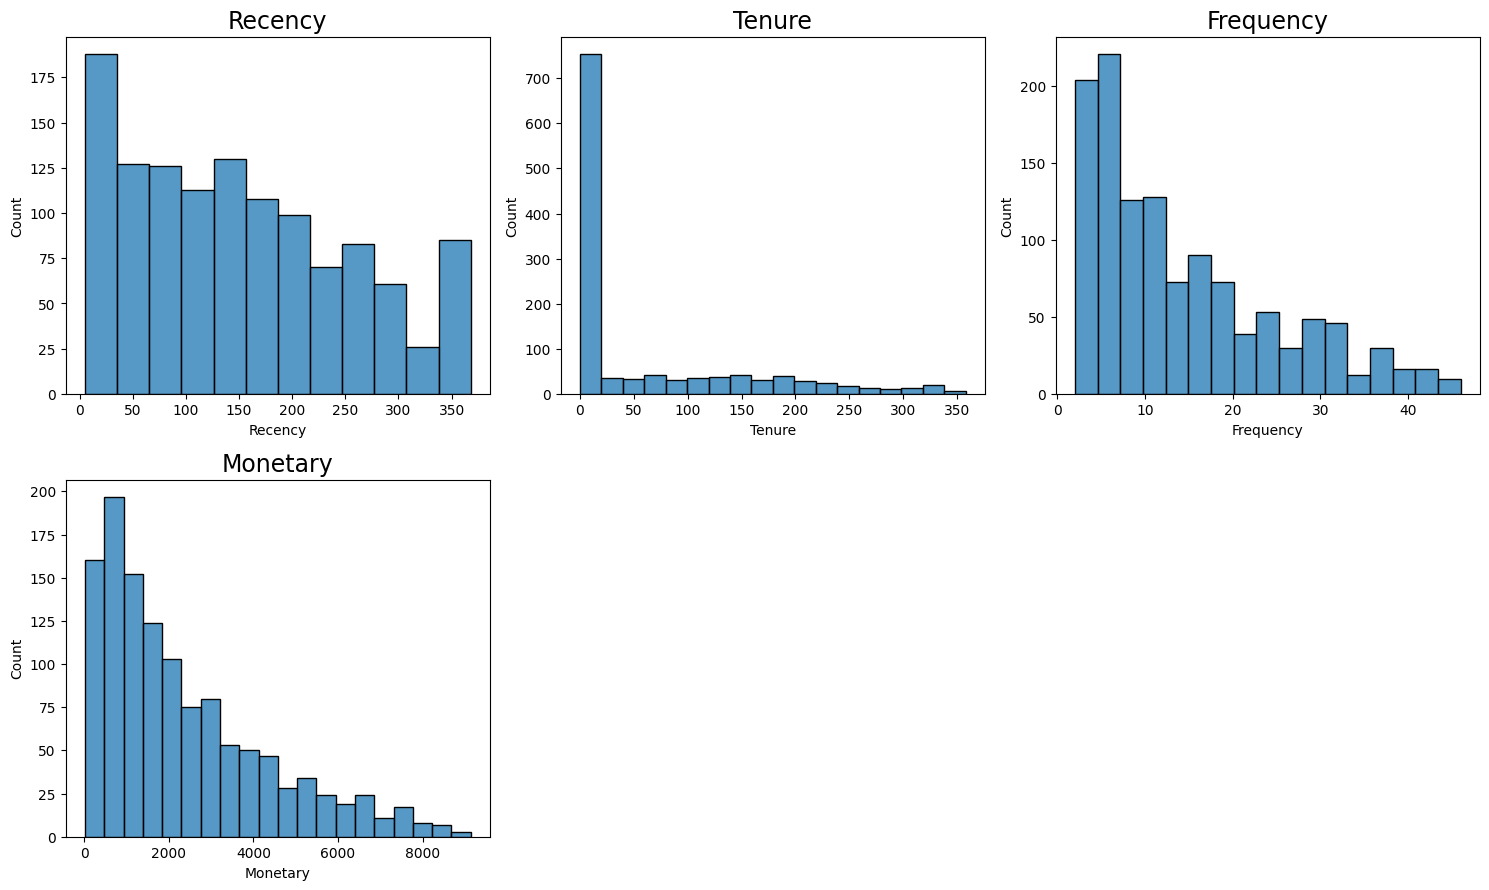

In [ ]:
plt.figure(figsize=(15,13))
for col in range(0, len(eda_rfm_data.columns)):
    plt.subplot(3,3,col+1)
    sns.histplot(x=eda_rfm_data[eda_rfm_data.columns[col]])
    plt.title(eda_rfm_data.columns[col], fontsize=17)
    plt.tight_layout()

## Preproseessing raw  data

In [ ]:
# Create some functions
def preprocess_raw(data):
    """
    Function to preprocess the raw data to RFM data

    Parameters
    ----------
    data : pandas DataFrame
        The sample raw data

    Returns
    -------
    data_rfm : pandas DataFrame
        The RFM data
    """
    # 1. Remove missing Customer ID
    data_raw = data[~data['CustomerID'].isna()]

    # 2. Create RFM ddata
    data_rfm = generate_rfmts(data = data_raw)

    # Validate RFM data
    print('RFM data shape :', data_rfm.shape)
    assert data_rfm.shape[0] == len(set(data_raw['CustomerID']))

    return data_rfm


In [ ]:
# Get the RFM data
data_rfm = preprocess_raw(data = eda)

data_rfm.head()

RFM data shape : (1468, 4)


,Recency,Tenure,Frequency,Monetary
CustomerID,,,,
12346,112,0,1,30.99
12347,64,223,31,13834.90
12348,78,119,8,1442.12
12350,22,0,11,1360.07
12356,112,0,13,1442.47


In [ ]:
def preprocess_rfm(data_rfm):
    """
    Function to clean the RFM data

    Parameters
    ----------
    data_rfm : pandas DataFrame
        The sample rfm data

    Returns
    -------
    data_clean : pandas DataFrame
        The RFM data
    """
    # 1. filter Frequency
    data_freq = data_rfm[data_rfm['Frequency'] >= 2]

    # 2. Remove outlier
    data_clean = drop_outlier(data = data_freq,
                              cols = ['Monetary', 'Frequency'])

    # 3. Filter data
    data_clean = data_clean[['Recency', 'Frequency', 'Monetary']]

    # Validate
    print('Data shape :', data_clean.shape)

    return data_clean


In [ ]:
# Get the clean RFM data
data_rfm_clean = preprocess_rfm(data_rfm = data_rfm)

data_rfm_clean.describe().T

Data shape : (1216, 3)


,Recency,Frequency,Monetary
count,1216.000000,1216.000000,1216.000000
mean,151.445724,14.182566,2345.441727
std,101.803354,10.668575,1979.630317
min,5.000000,2.000000,19.380000
25%,63.000000,6.000000,813.360000
50%,139.500000,11.000000,1745.265000
75%,225.000000,20.000000,3366.657500
max,368.000000,46.000000,9138.480000


- We only have repeat order customer in this data.
- Outliers have been removed

## Normalize  Data

In [ ]:
# Fit & transform scaler
from sklearn.preprocessing import MinMaxScaler

def fit_scaler(data):
    """
    Function to fit a min-max scaler

    Parameters
    ----------
    data : pandas DataFrame
        The sample RFM data

    Returns
    -------
    scaler : object
        The Min-Max scaler
    """
    # Create & fit scaler
    scaler = MinMaxScaler()
    scaler.fit(data)

    return scaler

def transform_scaler(data, scaler):
    """
    Function to fit a min-max scaler

    Parameters
    ----------
    data : pandas DataFrame
        The sample RFM data

    scaler : object
        The Min-Max scaler

    Returns
    -------
    data_clean : object
        The clean data
    """
    # Transform scaler
    data_clean = pd.DataFrame(scaler.transform(data))
    data_clean.index = data.index
    data_clean.columns = data.columns

    # Validate
    print("Data shape :", data.shape)

    return data_clean


In [ ]:
# Fit a scaler
scaler = fit_scaler(data = data_rfm_clean)

# Transform data
data_rfm_scaled = transform_scaler(data = data_rfm_clean,
                                   scaler = scaler)

data_rfm_scaled.head()

Data shape : (1216, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12348,0.201102,0.136364,0.156018
12350,0.046832,0.204545,0.147020
12356,0.294766,0.250000,0.156056
12359,0.358127,0.022727,0.063869
12370,0.520661,0.954545,0.756098


In [ ]:
data_rfm_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,1216.0,0.403432,0.280450,0.0,0.159780,0.370523,0.606061,1.0
Frequency,1216.0,0.276876,0.242468,0.0,0.090909,0.204545,0.409091,1.0
Monetary,1216.0,0.255076,0.217086,0.0,0.087068,0.189260,0.367062,1.0


We can see that the min-max scaling bound the value between 0-1

In [ ]:
def preprocess_data(data, scaler=None):
    """
    Function to preprocess the whole data

    Parameters
    ----------
    data : pandas DataFrame
        The raw sample data

    scaler : object, defatult=None
        The min-max scaler

    Returns
    -------
    data_clean : pandas DataFrame
        The clean data
    """
    # 1. Get the RFM data
    data_rfm = preprocess_raw(data = data)

    # 2. Get the clean RFM data
    data_rfm_clean = preprocess_rfm(data_rfm = data_rfm)

    # 3. Normalize data
    if scaler is None:
        # Create a scaler
        scaler = fit_scaler(data = data_rfm_clean)

    data_clean = transform_scaler(data = data_rfm_clean,
                                  scaler = scaler)

    # 4. Validate
    print('Data shape clean :', data_clean.shape)

    return data_clean, scaler


In [ ]:
data_clean, scaler = preprocess_data(data = eda)

RFM data shape : (1468, 4)
Data shape : (1216, 3)
Data shape : (1216, 3)
Data shape clean : (1216, 3)


In [ ]:
data_clean.head()

,Recency,Frequency,Monetary
CustomerID,,,
12348,0.201102,0.136364,0.156018
12350,0.046832,0.204545,0.147020
12356,0.294766,0.250000,0.156056
12359,0.358127,0.022727,0.063869
12370,0.520661,0.954545,0.756098


## Clustering

We use two approach:
1. Ranking method
2. K-means clustering



### Ranking metod

In [ ]:
# Copy data
data_bin = data_clean.copy()

In [ ]:
def binning_rfm(df):
    """
    Function for binning the data for making ranking method

    Parameter
    ---------
    df : pandas dataframe
         dataframe input for binning method

    Return
    ------
    df : pandas dataframe
         output binned dataframe
    """
    # Calculate quantiles for each variable
    quantiles = df.quantile(q=[0.2, 0.4, 0.6, 0.8])

    # Create bins for each variable
    r_bins = [-np.inf] + list(quantiles['Recency']) + [np.inf]
    f_bins = [-np.inf] + list(quantiles['Frequency']) + [np.inf]
    m_bins = [-np.inf] + list(quantiles['Monetary']) + [np.inf]

    # Create labels for the bins
    labels = [1, 2, 3, 4, 5]

    # label for recency (lower recency, higher ranking)
    labels_r = [5, 4, 3, 2, 1]

    # Bin each variable into five groups
    df['R_Group'] = pd.cut(df['Recency'], bins=r_bins, labels=labels_r).astype(int)
    df['F_Group'] = pd.cut(df['Frequency'], bins=f_bins, labels=labels).astype(int)
    df['M_Group'] = pd.cut(df['Monetary'], bins=m_bins, labels=labels).astype(int)

    # RFM score with average
    df['RFM_Score'] = np.round((df['R_Group']+df['F_Group']+df['M_Group'])/3,2)

    return df

Note,
- The bins include negative infinity as the lowest bin edge, followed by the quantile values, and positive infinity as the highest bin edge.
- We set different labels for recency, because lower recency is better (e.g., rank 5) and higher renceny is worst (e.g., rank 1)
- We calculate RFM score as average of Recency, Frequency, and Monetary ranking

In [ ]:
# bin the data
data_bin = binning_rfm(data_bin)

In [ ]:
# check the data
data_bin.head()

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score
CustomerID,,,,,,,
12348,0.201102,0.136364,0.156018,4,2,3,3.00
12350,0.046832,0.204545,0.147020,5,3,3,3.67
12356,0.294766,0.250000,0.156056,3,3,3,3.00
12359,0.358127,0.022727,0.063869,3,1,1,1.67
12370,0.520661,0.954545,0.756098,2,5,5,4.00


In [ ]:
# check data type
data_bin.dtypes

Recency      float64
Frequency    float64
Monetary     float64
R_Group        int64
F_Group        int64
M_Group        int64
RFM_Score    float64
dtype: object

- we need to check data types to make sure there's no categorical data type
- All data types are correct

In [ ]:
# check descriptive stats
data_bin.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,1216.0,0.403432,0.280450,0.0,0.159780,0.370523,0.606061,1.0
Frequency,1216.0,0.276876,0.242468,0.0,0.090909,0.204545,0.409091,1.0
Monetary,1216.0,0.255076,0.217086,0.0,0.087068,0.189260,0.367062,1.0
R_Group,1216.0,3.012336,1.421416,1.0,2.000000,3.000000,4.000000,5.0
F_Group,1216.0,2.933388,1.448599,1.0,2.000000,3.000000,4.000000,5.0
M_Group,1216.0,2.998355,1.415376,1.0,2.000000,3.000000,4.000000,5.0
RFM_Score,1216.0,2.981488,1.123963,1.0,2.000000,3.000000,4.000000,5.0


- We want to assign segment
- For RFM score 0-1 will be assigned as High Potential Churn
- For RFM score 1-2 will be assigned as At Risk Customers
- For RFM score 2-3 will be assigned as Potential Customers
- For RFM score 3-4 will be assigned as Loyal Customers
- For RFM score 4-5 will be assigned as Best Customers

In [ ]:
def assign_segment(rfm_df):
    """
    function to assign RFM_score to segment

    Parameter
    ---------
    rfm_df : pandas DataFrame
        preprocessed and binned rfm dataframe

    Return
    ------
    rfm_df : pandas dataframe
        dataframe with segment labels
    """
    # Assign segment names
    labels = ['High Potential Churn', 'At Risk Customers',
              'Potential Customers', 'Loyal Customers',
              'Best Customers']

    rfm_df['Segment'] = pd.cut(rfm_df['RFM_Score'],
                               bins = [0, 1, 2, 3, 4, 5],
                               labels = labels)
    return rfm_df

In [ ]:
# create label
data_bin = assign_segment(data_bin)

In [ ]:
# check the data
data_bin.head()

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
CustomerID,,,,,,,,
12348,0.201102,0.136364,0.156018,4,2,3,3.00,Potential Customers
12350,0.046832,0.204545,0.147020,5,3,3,3.67,Loyal Customers
12356,0.294766,0.250000,0.156056,3,3,3,3.00,Potential Customers
12359,0.358127,0.022727,0.063869,3,1,1,1.67,At Risk Customers
12370,0.520661,0.954545,0.756098,2,5,5,4.00,Loyal Customers


Check each of the `RFM_Score` match with `Segment` name

In [ ]:
# check data bin with RFM score > 4
data_bin[data_bin['RFM_Score'] > 4]

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
CustomerID,,,,,,,,
12383,0.272727,0.840909,0.541143,4,5,5,4.67,Best Customers
12431,0.110193,0.681818,0.611989,5,5,5,5.00,Best Customers
12474,0.165289,0.568182,0.742679,4,5,5,4.67,Best Customers
12484,0.410468,0.750000,0.582926,3,5,5,4.33,Best Customers
12502,0.041322,0.431818,0.559203,5,4,5,4.67,Best Customers
...,...,...,...,...,...,...,...,...
18178,0.033058,0.295455,0.316368,5,4,4,4.33,Best Customers
18202,0.063361,0.340909,0.516150,5,4,5,4.67,Best Customers
18223,0.239669,0.681818,0.480773,4,5,5,4.67,Best Customers


- Let's plot using boxplot to see each cluster characteristics
- Then, we can plot each pair of RFM variables using scatterplot with Hue `segment`

In [ ]:
# Inverse transform data_bin
for col in ['Recency', 'Frequency', 'Monetary']:
    # inverse transform X
    x = data_bin[col]

    # Find index
    idx = scaler.feature_names_in_.tolist().index(col)
    max_val = scaler.data_max_[idx]
    min_val = scaler.data_min_[idx]

    # Inverse transform
    data_bin[col] = x*(max_val-min_val) + min_val


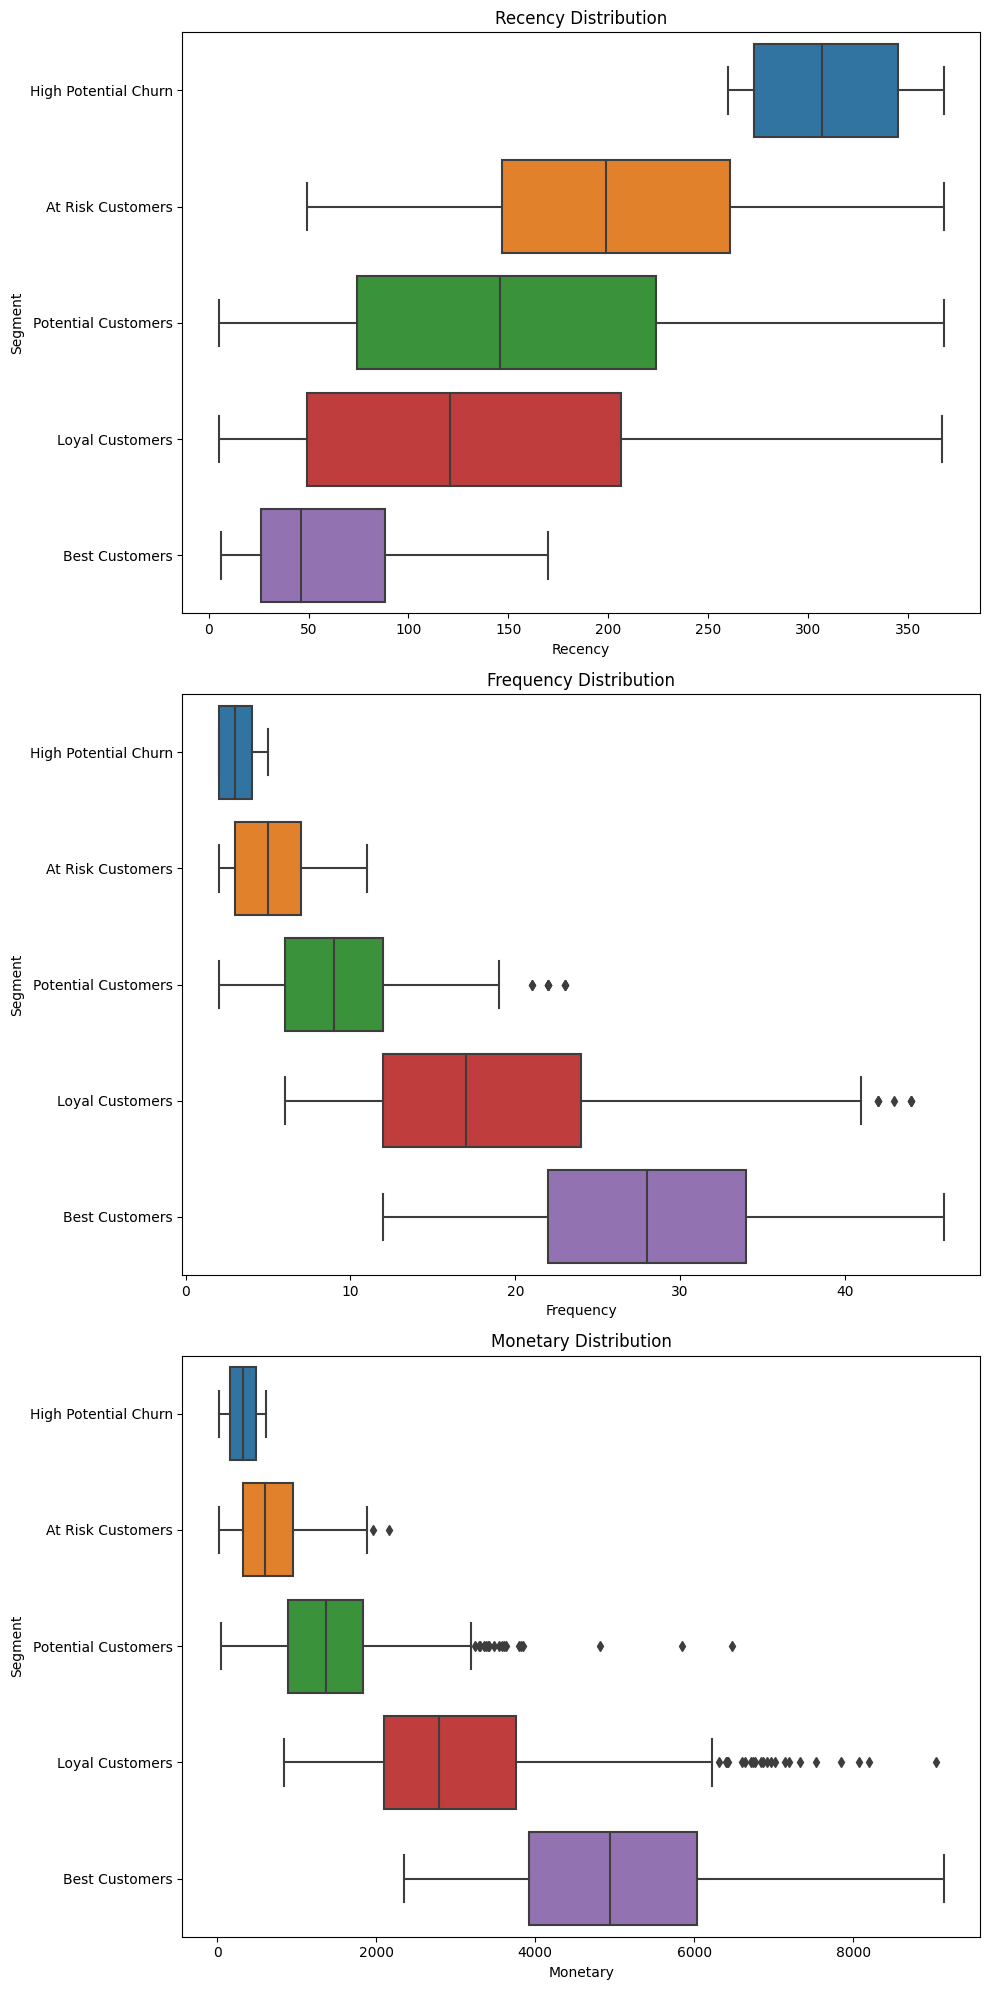

In [ ]:
# Plot with boxplot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

# Iterate over column
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(data = data_bin,
                y = 'Segment',
                x = col,
                ax = axes[i])

    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


In [ ]:
# groupby to get aggregate mean of each RFM variable
data_bin.groupby('Segment').agg({'Recency':'mean',
                                 'Frequency':'mean',
                                 'Monetary':'mean'}).round(2)

,Recency,Frequency,Monetary
Segment,,,
High Potential Churn,309.36,3.17,323.70
At Risk Customers,206.20,4.93,664.45
Potential Customers,154.62,9.40,1480.66
Loyal Customers,137.02,19.29,3178.55
Best Customers,59.11,28.58,5098.71


### Kmeans  clustering

1. Elbow method
2. K-means clustering

In [ ]:
# Import package
from sklearn.cluster import KMeans

In [ ]:
data_cluster_clean = data_clean[['Recency', 'Frequency', 'Monetary']]

In [ ]:
# Set empty list
inertia = []

# iterate for
for k in range(1, 11):
    # create
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # fit object
    kmeans.fit(data_cluster_clean)

    # append results
    inertia.append(kmeans.inertia_)


Text(0.5, 1.0, 'Elbow Method Showing the Optimal K')

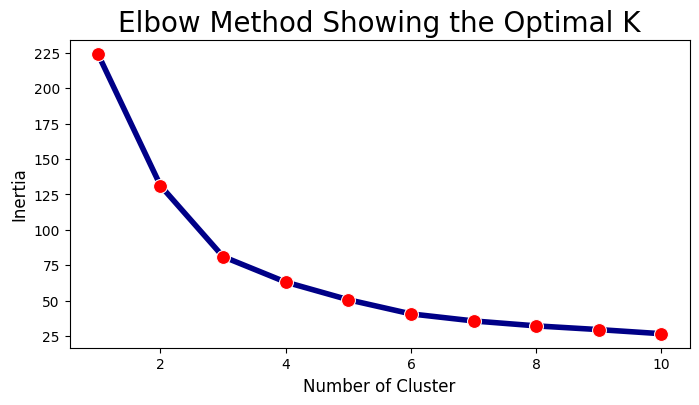

In [ ]:
plt.figure(figsize=(8, 4))

# plt.plot(inertia)
sns.lineplot(x=range(1, 11), y=inertia, color='#000087',
             linewidth = 4, marker='o', markersize=10,
             markerfacecolor='red')

plt.xlabel('Number of Cluster', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method Showing the Optimal K', fontsize=20)

- We want to cluster using K-Means with `n_cluster = 3`
- Find the centroids coordinate for clusters

In [ ]:
# Refit best data
kmeans_best = KMeans(n_clusters = 3,
                     random_state = 42,
                     n_init = 10) # Number of times the k-means algorithm will be run with different initial centroids

# fit
kmeans_best.fit(data_cluster_clean)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Predict
data_label = kmeans_best.predict(data_cluster_clean)
data_label

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [ ]:
# Get the coordinates of the centroids
centroids = kmeans_best.cluster_centers_

In [ ]:
# create dataframe
centroid_df = pd.DataFrame(centroids,
                           columns=['Recency', 'Frequency', 'Monetary']).rename_axis('Cluster', axis='index')

# show dataframe centroid
centroid_df

,Recency,Frequency,Monetary
Cluster,,,
0,0.721491,0.168654,0.158895
1,0.235275,0.163208,0.155891
2,0.294880,0.632602,0.567795


In [ ]:
# Inverse transform data
data_cluster = pd.DataFrame(scaler.inverse_transform(data_clean))
data_cluster.index = data_clean.index
data_cluster.columns = data_clean.columns

# Build data
data_cluster = data_cluster[['Recency', 'Frequency', 'Monetary']]
data_cluster['label'] = data_label
data_cluster.head()

,Recency,Frequency,Monetary,label
CustomerID,,,,
12348,78.0,8.0,1442.12,1
12350,22.0,11.0,1360.07,1
12356,112.0,13.0,1442.47,1
12359,135.0,3.0,601.81,1
12370,194.0,44.0,6914.31,2


In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment
data_cluster.groupby('label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'label':'count',
}).round(1)

,Recency,Frequency,Monetary,label
label,,,,
0,266.9,9.4,1468.4,385
1,90.4,9.2,1441.0,541
2,112.0,29.8,5197.2,290


- **Cluster 0** --> Average Customers
  - **Characteristic**: low recency, medium frequency & monetary

<br>

- **Cluster 1** --> At Risk Customers
  - **Characteristic**: high recency, low frequency & monetary

<br>

- **Cluster 2** --> Best Customers
  - Characteristic: low recency, high frequency & monetary

In [ ]:
# Function to assign label
def assign_label(val):
    """Function to assign label"""
    if val == 0:
        return 'Average Customer'
    elif val == 1:
        return 'At Risk Customer'
    else:
        return 'Best Customer'

# Create a new column 'Customer_Type' based on 'K_cluster' values
data_cluster['Customer_Type'] = data_cluster['label'].apply(assign_label)

# check result
data_cluster.head()

,Recency,Frequency,Monetary,label,Customer_Type
CustomerID,,,,,
12348,78.0,8.0,1442.12,1,At Risk Customer
12350,22.0,11.0,1360.07,1,At Risk Customer
12356,112.0,13.0,1442.47,1,At Risk Customer
12359,135.0,3.0,601.81,1,At Risk Customer
12370,194.0,44.0,6914.31,2,Best Customer


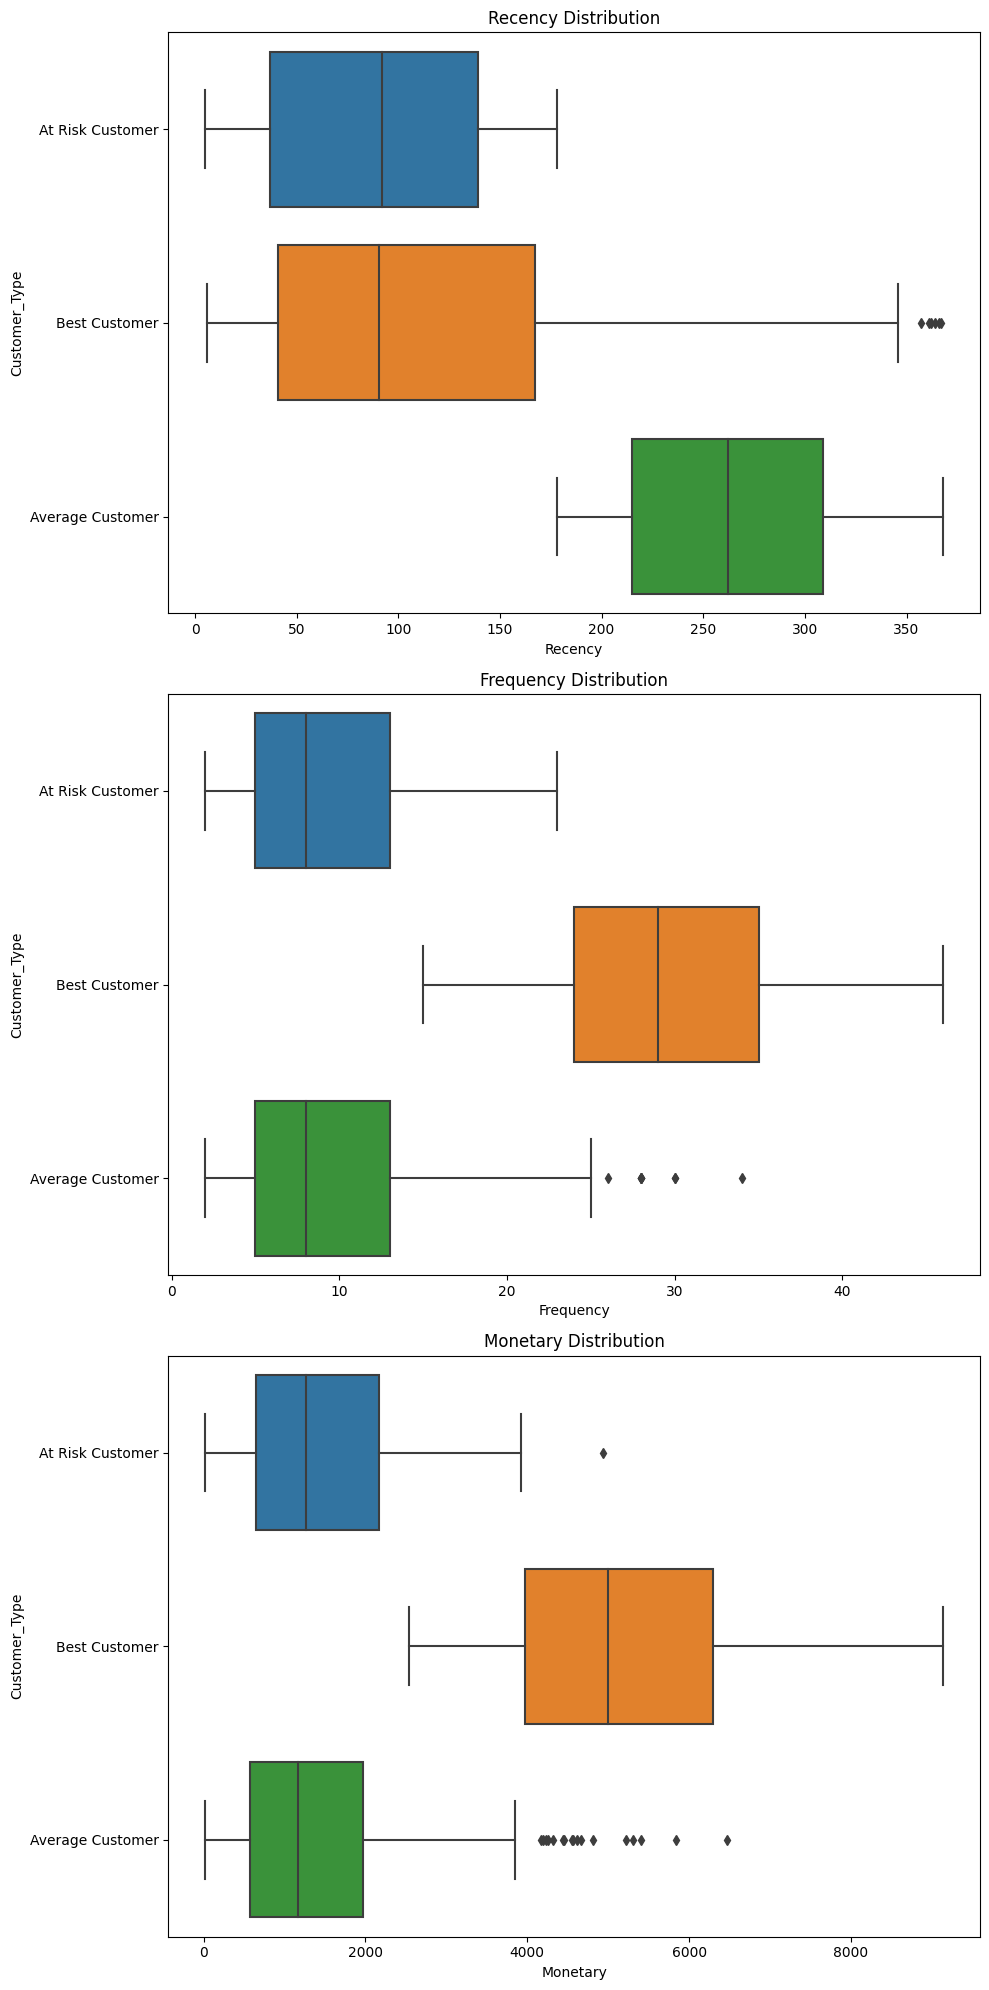

In [ ]:
# Plot with boxplot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

# Iterate over column
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(data = data_cluster,
                y = 'Customer_Type',
                x = col,
                ax = axes[i])

    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# Apply inverse scaling to the data_clean DataFrame
data_clean_ori = pd.DataFrame(scaler.inverse_transform(data_clean))

# Assign the original index to the new DataFrame
data_clean_ori.index = data_clean.index

 # Assign the original column names to the new DataFrame
data_clean_ori.columns = data_clean.columns

In [ ]:
# show the clean data
data_clean_ori.head()

,Recency,Frequency,Monetary
CustomerID,,,
12348,78.0,8.0,1442.12
12350,22.0,11.0,1360.07
12356,112.0,13.0,1442.47
12359,135.0,3.0,601.81
12370,194.0,44.0,6914.31


In [ ]:
# show desc stats
data_clean_ori.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,1216.0,151.445724,101.803354,5.00,63.00,139.500,225.0000,368.00
Frequency,1216.0,14.182566,10.668575,2.00,6.00,11.000,20.0000,46.00
Monetary,1216.0,2345.441727,1979.630317,19.38,813.36,1745.265,3366.6575,9138.48


Text(0.5, 1.0, 'Recency Distribution')

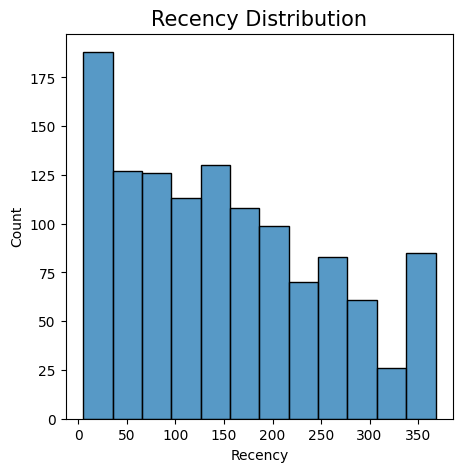

In [ ]:
# Plot recency
plt.figure(figsize=(5,5))
sns.histplot(data_clean_ori['Recency'])
plt.title('Recency Distribution', fontsize=15)

Text(0.5, 1.0, 'Monetary Distribution')

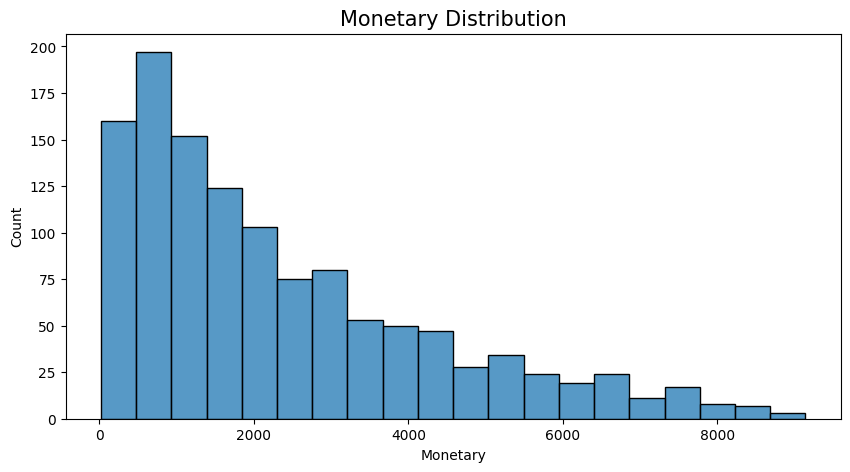

In [ ]:
# Plot monetary
plt.figure(figsize=(10,5))
sns.histplot(data_clean_ori['Monetary'])
plt.title('Monetary Distribution', fontsize=15)
#plt.xlim(0,40000)

Text(0.5, 1.0, 'Frequency Distribution')

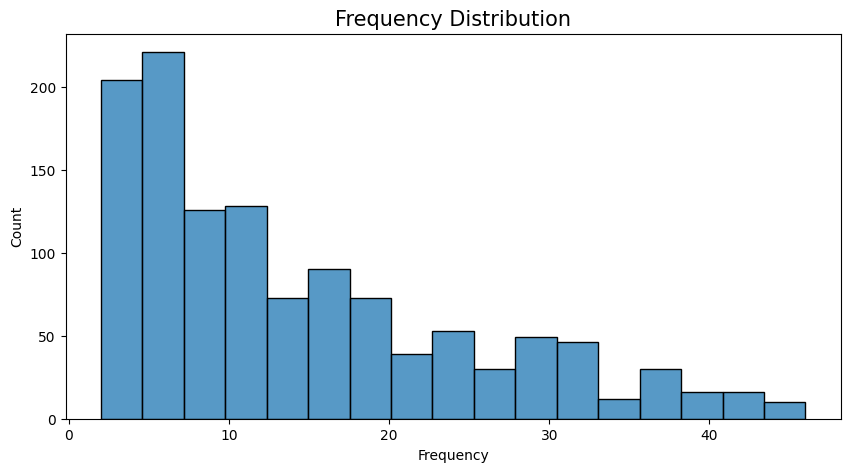

In [ ]:
# Plot monetary
plt.figure(figsize=(10,5))
sns.histplot(data_clean_ori['Frequency'])
plt.title('Frequency Distribution', fontsize=15)